In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [274]:
size = 200 # Dimensions of 2D array
dx  = 1.0 # Space step
T = 400 # Total time
dt = 0.01 # Time step
n = int(T/dt) # Number of iterations
print(n)

40000


In [275]:
delta = 2.2
n_mode = 4
m_mode = 2
min_D = delta*1/((np.pi**2)*(n_mode**2+m_mode**2)/(size**2))
minimum = delta/min_D
print(minimum)
maximum = 1-2*(delta/min_D)
print(maximum)
assert minimum <= maximum
# D = 8.707289219
D = delta*((minimum+maximum)/2)
print(D)

0.004934802200544679
0.9901303955989107
1.094571717579401


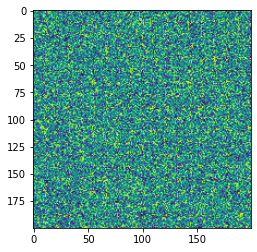

In [276]:
U = (np.random.rand(size, size))+1# U = morphogen
# U = np.full((size, size), (a+b))
# V = np.full((size, size), b/((a+b)**2))
V = (np.random.rand(size, size))+1
plt.imshow(U, interpolation='bilinear')

In [277]:
def laplacian(Z): # Approximates, using the finite difference method, the sum of the second derivatives (used in the PDE)
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcentre = Z[1:-1, 1:-1]
    return (Zleft + Zright + Ztop + Zbottom - (4*Zcentre))/(dx**2)

In [278]:
def show_patterns(U, ax=None):
    
    ax.set_axis_off()

In [279]:
for i in tqdm(range(n)):
#     for Z in (U,V):
#         Z[:, :] = (Z[:, :]/np.amax(Z))
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    U[1: -1, 1:-1] = Uc + dt*(deltaU - Uc + ((Uc**2)/Vc))
    V[1: -1, 1:-1] = Vc + dt*(deltaV*D + delta*((Uc**2)-Vc))
    # Neumannn conditions: derivatives at the edges are null (so it to same value as next one in so rate of change is 0)
    for Z in (U,V):
        Z[0, :] = Z[1, :]
        Z[-1,:] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

100%|██████████| 40000/40000 [00:40<00:00, 979.61it/s] 


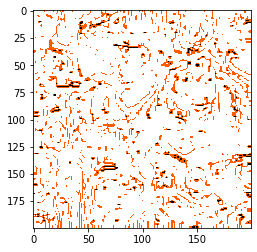

In [280]:
plt.imshow(U, cmap='hot', interpolation='bilinear')

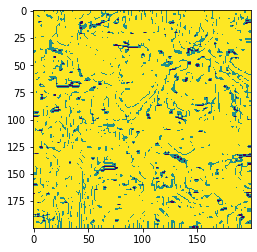

In [281]:
plt.imshow(U, interpolation='bilinear')
plt.savefig("sharp_edges_pattern.png")

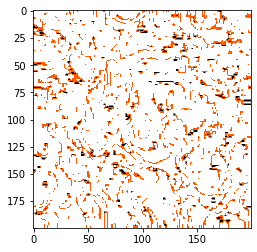

In [273]:
plt.imshow(U, cmap='hot', interpolation='bilinear')